In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://cocl.us/datascience_survey_data', index_col='Unnamed: 0')
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [3]:
df.sort_values('Very interested', ascending=False, inplace=True)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [4]:
import matplotlib.pyplot as plt

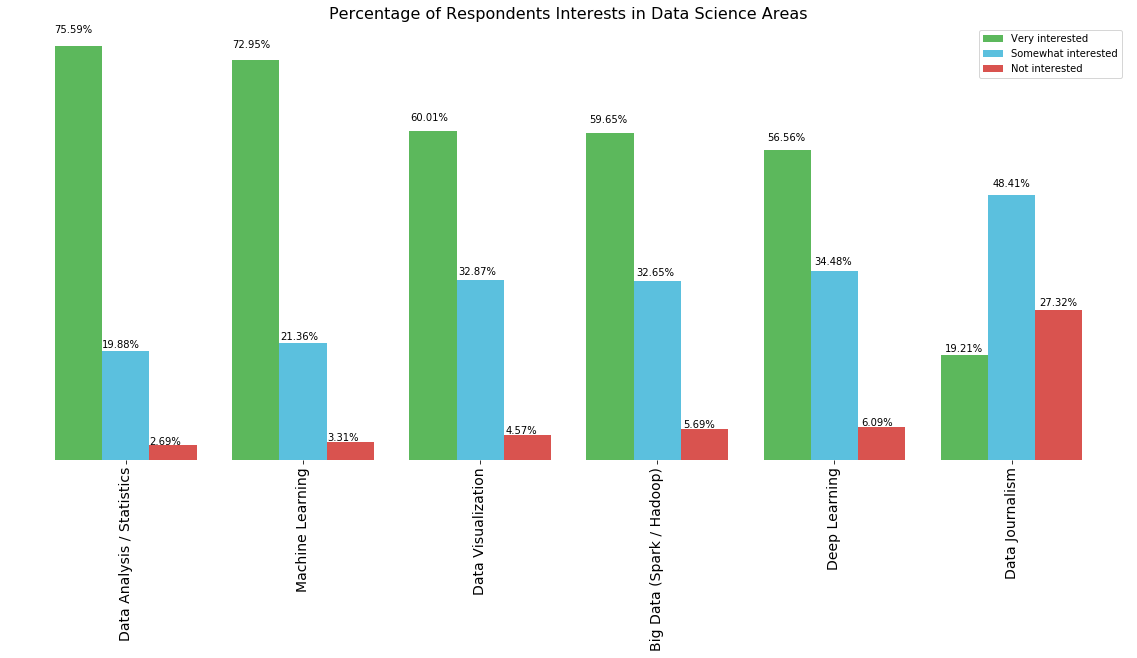

In [5]:
df_survey_pct = ((df/ 2233) * 100).round(2)

ax = df_survey_pct.plot(kind='bar',
                       figsize = (20, 8),
                       width = 0.8,
                       color = ['#5cb85c', '#5bc0de', '#d9534f'],
                       fontsize = 14)

plt.title('Percentage of Respondents Interests in Data Science Areas', fontsize=16) # add title to the plot

# Solution inspired in https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color/23907866
ax.set_facecolor((1.0, 1.0, 1.0))

# Solution inspired in https://stackoverflow.com/questions/40705614/hide-axis-label-only-not-entire-axis-in-pandas-plot
# y_axis = ax.axes.get_yaxis()
# y_axis.set_visible(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Solution inspired in https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.03))
    
plt.show()

In [6]:
df2 = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

In [7]:
df3 = df2.PdDistrict.value_counts(sort=False).rename_axis('Neighborhood').reset_index(name='Count')
df3

,Neighborhood,Count
0,MISSION,19503
1,INGLESIDE,11594
2,TARAVAL,11325
3,TENDERLOIN,9942
4,CENTRAL,17666
5,BAYVIEW,14303
6,NORTHERN,20100
7,PARK,8699
8,SOUTHERN,28445
9,RICHMOND,8922


In [8]:
!wget --quiet https://cocl.us/sanfran_geojson -O sanfran_geojson.json

In [10]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

In [ ]:
sanfran_geo = r'sanfran_geojson.json'
sanfran_map = folium.Map(location=[37.773972, -122.431297], zoom_start=12)
sanfran_map

In [ ]:
sanfran_map.choropleth(
    geo_data=sanfran_geo, 
    data=df3, 
    columns=['Neighborhood', 'Count'],
    key_on='properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

In [ ]:
sanfran_map